In [ ]:
import matplotlib.pyplot as plt


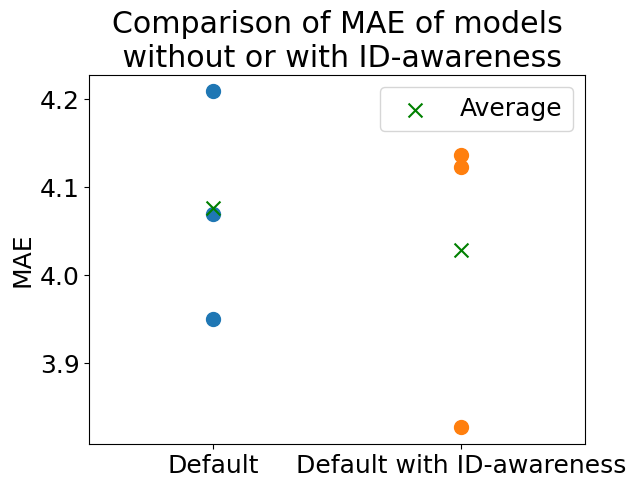

In [ ]:
plt.rcParams.update({'font.size': 18})

default_errors = [3.95006284157435, 4.06939767423429, 4.20824378766511]
id_awareness_errors = [4.1224047058507, 4.13595043680124, 3.82736308382268]

plt.scatter([1]*len(default_errors), default_errors,s=100)
plt.scatter([2]*len(id_awareness_errors), id_awareness_errors,s=100)

plt.scatter([1,2], [sum(default_errors)/len(default_errors),sum(id_awareness_errors)/len(id_awareness_errors)], color="green", marker="x",s=100,label="Average")

plt.title("Comparison of MAE of models\n without or with ID-awareness")
plt.ylabel("MAE")
plt.xticks([1, 2], ["Default", "Default with ID-awareness"])

plt.legend()

plt.xlim(0.5, 2.5)

# plt.savefig("id_awareness_comparison.png")

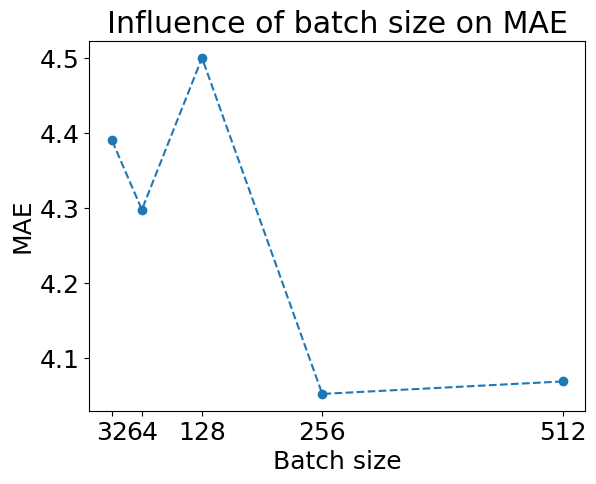

In [ ]:
errors = [4.06939767423429, 4.05275434828641, 4.50049935232129, 4.29826683345593,4.39102087250927]
batch_sizes = [512,256,128,64,32]
#4.06939767423429, 4.20824378766511

plt.plot(batch_sizes, errors, "--o")


plt.title("Influence of batch size on MAE")
plt.ylabel("MAE")
plt.xlabel("Batch size")
# plt.xticks([1, 2], ["Default", "Default with ID-awareness"])
plt.xticks(batch_sizes, batch_sizes)

# plt.legend()

# plt.xlim(0.5, 2.5)
# plt.savefig("batch_size_influence.png")

In [49]:
#depth 2

d2 = {(128,512):4.06939767423429,
      (64,64):4.07608581944515}

# depth 3

d3 = {(8,512) : 4.00128221729345,
 (16,256): 4.32034326754118,
 (32,128): 3.99074962032468,
 (64,64): 4.17094948484186}

# depth 4

d4 = {(64,64): 4.04289894810894}

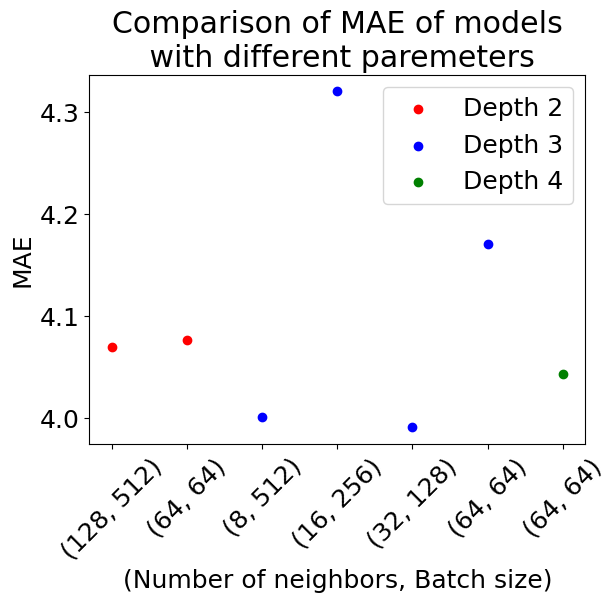

In [51]:
l2 = list(d2.values())

l3 = list(d3.values())

l4 = list(d4.values())

yy = l2+l3+l4
xx = range(len(yy))

colors = ["red"]*len(l2)+["blue"]*len(l3)+["green"]*len(l4)
labels = ["Depth 2"]*len(l2)+["Depth 3"]*len(l3)+["Depth 4"]*len(l4)

plt.title("Comparison of MAE of models\n with different paremeters")

plt.xticks(xx, list(d2.keys())+list(d3.keys())+list(d4.keys()), rotation=45)

plt.scatter(xx[:len(l2)], yy[:len(l2)], c="red", label="Depth 2")
plt.scatter(xx[len(l2):len(l2)+len(l3)], yy[len(l2):len(l2)+len(l3)], c="blue", label="Depth 3")
plt.scatter(xx[len(l2)+len(l3):], yy[len(l2)+len(l3):], c="green", label="Depth 4")

plt.ylabel("MAE")
plt.xlabel("(Number of neighbors, Batch size)")


plt.legend()